In [1]:
using Pkg
Pkg.add("Plots")
Pkg.add("NLsolve")
Pkg.add("LinearAlgebra")
using Plots
using NLsolve

   Resolving package versions...
  No Changes to `~/NumericalNavier/MichaelFolder/Project.toml`
  No Changes to `~/NumericalNavier/MichaelFolder/Manifest.toml`
   Resolving package versions...
  No Changes to `~/NumericalNavier/MichaelFolder/Project.toml`
  No Changes to `~/NumericalNavier/MichaelFolder/Manifest.toml`
   Resolving package versions...
  No Changes to `~/NumericalNavier/MichaelFolder/Project.toml`
  No Changes to `~/NumericalNavier/MichaelFolder/Manifest.toml`


Implementing the one dimensional wave equation

┌ Info: Saved animation to /Users/michaeltomadakis/NumericalNavier/MichaelFolder/waveOverTime.gif
└ @ Plots /Users/michaeltomadakis/.julia/packages/Plots/Pe7wF/src/animation.jl:156


Plots.AnimatedGif("/Users/michaeltomadakis/NumericalNavier/MichaelFolder/waveOverTime.gif")
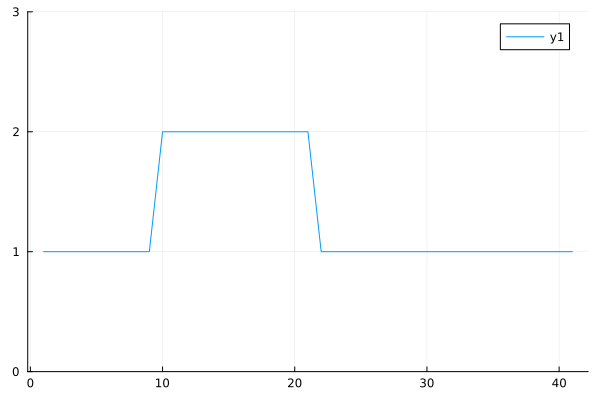

In [10]:
nx = 41
dx = 2 / (nx - 1)
nt = 50    #the number of timesteps we want to calculate
nu = 0.3   #the value of viscosity
sigma = .2 #sigma is a parameter, we'll learn more about it later
dt = sigma * dx^2 / nu #dt is defined using sigma ... more later!


u = ones(nx)      #a numpy array with nx elements all equal to 1.
u[Int(.5 / dx):Int(1 / dx + 1)] .= 2  #setting u = 2 between 0.5 and 1 as per our I.C.s

un = ones(nx) #our placeholder array, un, to advance the solution in time

anim = @animate for time in 1:nt  #iterate through time
    un = copy(u) ##copy the existing values of u into un
    plot(u, ylimit=[0,3])
    for i in 2:(nx-1)
        u[i] = un[i] + nu * dt / dx^2 * (un[i+1] - 2 * un[i] + un[i-1]) 
    end
end

gif(anim, "waveOverTime.gif", fps = 10)